## Régression Linéaire Multiple
Guillaume Saint-Cirgue
https://machinelearnia.com/

In [145]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt 

# 2. Régression Multiples Variables
C'est lorsqu'on integre plusieures variables $x_1, x_2, x_3, etc.$ à notre modèle que les choses commencent à devenir vraiment intéressantes. C'est peut-être aussi à ce moment que les gens commencent parfois à parler *d'intelligence artificielle*, car il est difficile pour un être humain de se représenter dans sa tête un modèle à plusieurs dimensions (nous n'évoluons que dans un espace 3D). On se dit alors que la machine, quant à elle, arrive à se réprésenter ces espaces, car elle y trouve le meilleur modèle (avec la descente de gradient) et les gens disent donc qu'elle est intelligente, alors que ce ne sont que des mathématiques.

## 2.1 Dataset


Dans ce notbook, nous allons créer un modèle à 2 variables $x_1, x_2$. Pour cela, il suffit d'injecter les différentes variables $x_1, x_2$ (les **features** en anglais) dans la matrice $X$, et de créer le vecteur $\theta$ qui s'accorde avec:



$X = \begin{bmatrix} x^{(1)}_1 & x^{(1)}_2 & 1 \\ ... & ... & ... \\ x^{(m)}_1 & x^{(m)}_2 & 1 \end{bmatrix}$

$\theta = \begin{bmatrix} a\\b\\c \end{bmatrix}$

$y = \begin{bmatrix} y^{(1)}\\...\\y^{(m)} \end{bmatrix}$ *note : le vecteur $y$ reste le meme que pour la régression linéaire*


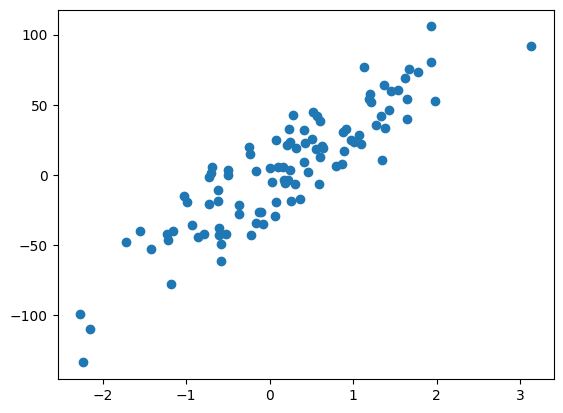

In [146]:
x,y= make_regression(n_samples=100, n_features=2, noise=10)
plt.scatter(x[:,0],y)

In [147]:
print(x.shape)
print(y.shape)
y= y .reshape(y.shape[0],1)  # y.shape[0]: le nombre de ligne dans y
print(y.shape)

(100, 2)
(100,)


In [149]:
# matrice X
X= np.hstack((x, np.ones((x.shape[0],1))))  # coller le vecteur x à un vecteur de 1 ayant le meme nombre
print(X.shape)
print(X[:10])

(100, 3)
[[-2.23907149 -2.42250246  1.        ]
 [-0.07515702 -1.44108565  1.        ]
 [ 1.93902824 -0.19581529  1.        ]
 [ 3.13448275 -1.48912078  1.        ]
 [ 1.64680531 -0.50116208  1.        ]
 [ 0.60161416  0.48620555  1.        ]
 [ 1.07027146 -1.14778416  1.        ]
 [ 0.86984099 -1.28906155  1.        ]
 [ 0.56746376  0.79231904  1.        ]
 [ 0.30993623 -1.0720926   1.        ]]


In [150]:
theta = np.random.randn(3, 1)
theta

array([[-0.24976962],
       [ 1.14198523],
       [ 1.18983244]])

## Modèle

In [151]:
def model(X,theta):
    return X.dot(theta)

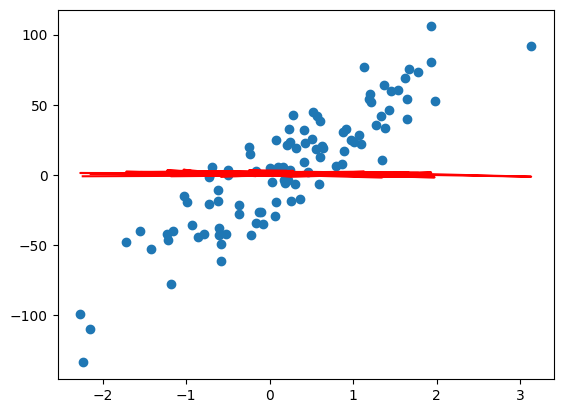

In [152]:
plt.scatter(x[:,0],y)
plt.plot(x[:,0],model(X,theta), c ='r')

## Fonction cout

In [153]:
def cost_function(X,y,theta):
    m= len(y)
    return 1/(2*m) * np.sum((model(X,theta)-y)**2)

In [154]:
cost_function(X,y,theta)

919.132449488965

## Gradient de Descente de Gradient

In [155]:
def grad(X,y,theta):
    m=len(y)
    return 1/m * X.T.dot(model(X,theta)-y)

In [156]:
def gradient_descent(X,y,theta,learning_rate, n_iterations):
    cost_history= np.zeros(n_iterations)
    for i in range(0,n_iterations):
        theta= theta - learning_rate * grad(X,y,theta)
        cost_history[i]=cost_function(X,y,theta)
    return theta, cost_history

## Phase d'entrainement

In [157]:
# X.shape
theta_final, cost_history= gradient_descent(X,y,theta,learning_rate=0.01, n_iterations=1000)
theta_final

array([[38.37409814],
       [15.93122084],
       [-0.22440179]])

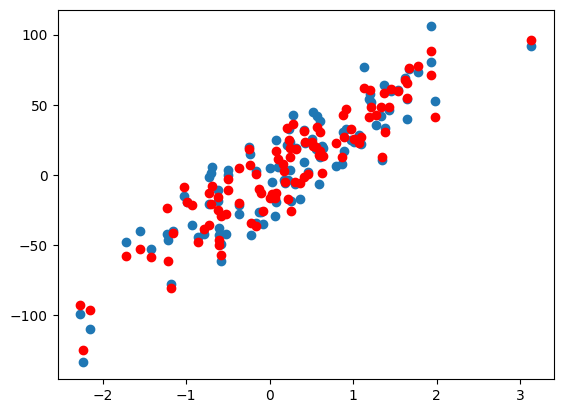

In [158]:
predictions = model(X,theta_final)
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],predictions,c='r')

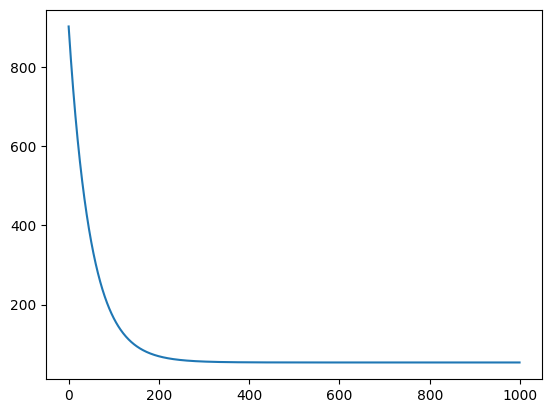

In [159]:
plt.plot(range(1000),cost_history)

Pour évaluer la réelle performance de notre modele avec une métrique populaire (pour votre patron, client, ou vos collegues) on peut utiliser le coefficient de détermination, aussi connu sous le nom R². Il nous vient de la méthode des moindres carrés. Plus le résultat est proche de 1, meilleur est votre modele:

![Coefficient de détermination](coeff_determination.png).



In [160]:
def coef_determination(y,pred):
    u = ((y-pred)**2).sum()
    v= ((y - y.mean())**2).sum()
    return 1- u/v

In [161]:
coef_determination(y,predictions)

0.9411797028626463

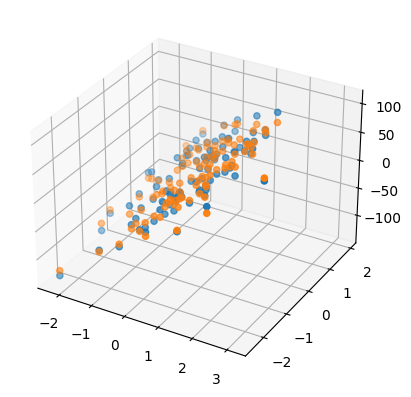

In [162]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,0], x[:,1], y)
ax.scatter(x[:,0], x[:,1], predictions)